In [1]:
import sys
import os
import json
import pickle
from pathlib import Path
import matplotlib.pyplot as plt

from IPython.display import display, Image

import torch
import pydicom

In [2]:
%matplotlib inline

In [3]:
patient_dir = Path("/ssd_data/IRCAD/3Dircadb1.1/PATIENT_DICOM/")
patient_dir.exists()

True

In [56]:
import zipfile

dataset_dir = Path("/ssd_data/IRCAD/3Dircadb1/")
for path in sorted(list(dataset_dir.iterdir())):
    print(path.name)
    for patient_path in sorted(list(path.iterdir())):
        print(f"  {patient_path.name}")
        if patient_path.suffix == ".zip":
            if not patient_path.with_suffix("").exists() or len(list(patient_path.with_suffix("").iterdir())) <= 1:
                # Extract the folder
                print(f"  - Extracting...")
                patient_path.with_suffix("").mkdir(parents=True, exist_ok=True)
                with zipfile.ZipFile(patient_path, 'r') as zip_ref:
                    zip_ref.extractall(str(patient_path.parent))
        elif patient_path.is_dir():
            print(f"    {len(list(patient_path.iterdir()))}")
    break

3Dircadb1.1
  LABELLED_DICOM
    129
  LABELLED_DICOM.zip
  LICENSE.txt
  MASKS_DICOM
    19
  MASKS_DICOM.zip
  MESHES_VTK
    19
  MESHES_VTK.zip
  PATIENT_DICOM
    129
  PATIENT_DICOM.zip
  liver_01.jpg


In [55]:
masks_dir = patient_dir.parent / "MASKS_DICOM"
masks_dir.exists()

True

In [5]:
ct_data = list(patient_dir.glob("*"))
len(ct_data)

129

In [6]:
liver_mask_data = list((masks_dir / "liver").glob("*"))
len(liver_mask_data)

129

In [7]:
ct_filename = ct_data[10]
ct_filename

PosixPath('/ssd_data/IRCAD/3Dircadb1.1/PATIENT_DICOM/image_36')

In [8]:
liver_filename = Path(*list(ct_filename.parts[:-2])) / "MASKS_DICOM" / "liver" / ct_filename.stem
liver_filename

PosixPath('/ssd_data/IRCAD/3Dircadb1.1/MASKS_DICOM/liver/image_36')

In [9]:
patient_liver_mask_data = pydicom.read_file(liver_filename)

In [10]:
patient_image_data = pydicom.read_file(ct_filename)
patient_image_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 256
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.3443106066617011175244477802376801028
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.1.0.126.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.1.0'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/VTK 5.4.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.3443106066617011175244477802376801

In [86]:
patient_image_data.PatientAge

AttributeError: 'FileDataset' object has no attribute 'PatientAge'

In [11]:
patient_image_data.pixel_array.shape

(512, 512)

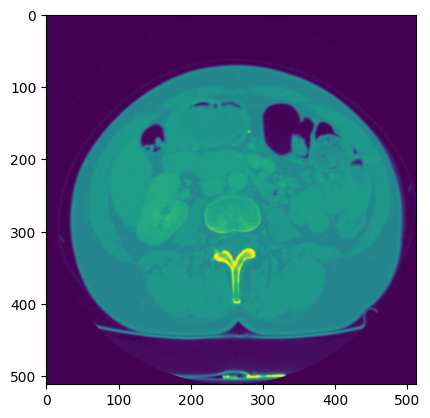

In [18]:
plt.imshow(patient_image_data.pixel_array)

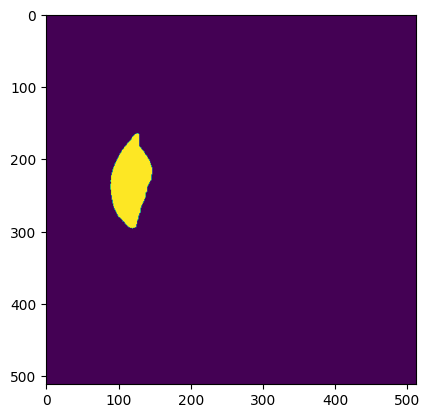

In [81]:
plt.imshow(patient_liver_mask_data.pixel_array)

In [15]:
patient_liver_mask_data.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
patient_liver_mask_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 256
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.6044917864494493198835383834009370662
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.1.0.126.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.1.0'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/VTK 5.4.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.6044917864494493198835383834009370

In [89]:
str(patient_liver_mask_data.PatientName).split("^")

['liver_01', 'liver']

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 256
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.3312312539555110344407119795426937274
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.1.0.126.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.1.0'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/VTK 5.4.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.3312312539555110344407119795426937

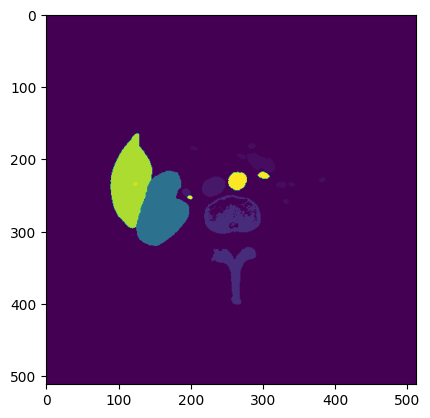

In [61]:
labeled_filename = Path(*list(ct_filename.parts[:-2])) / "LABELLED_DICOM" / ct_filename.stem
labeled_filename
labeled_data = pydicom.read_file(labeled_filename)
print(labeled_data)
plt.imshow(labeled_data.pixel_array)

In [62]:
values = {}
for row in labeled_data.pixel_array:
    for val in row:
        if values.get(val) is not None:
            values[val] += 1
        else:
            values[val] = 1

In [70]:
sorted(list(values.keys()))

[0, 1, 17, 33, 65, 193, 449, 481, 513]

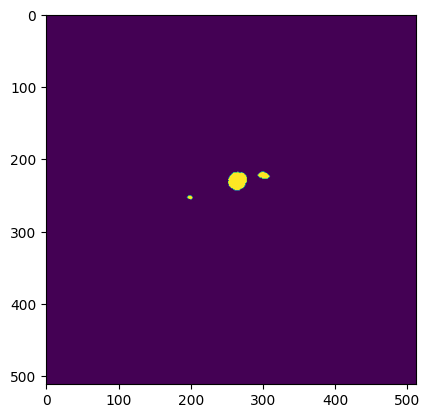

In [80]:
plt.imshow(labeled_data.pixel_array == 513)

In [82]:
values = {}
for row in patient_liver_mask_data.pixel_array:
    for val in row:
        if values.get(val) is not None:
            values[val] += 1
        else:
            values[val] = 1

In [83]:
sorted(list(values.keys()))

[0, 255]